In [1]:
import sqlite3

In [2]:
connection = sqlite3.connect("mydb.db")

In [3]:
connection

In [4]:
table_creation_query="""
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    hire_date TEXT NOT NULL,
    salary REAL NOT NULL
);
"""

In [5]:
table_creation_query2="""
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    phone TEXT
);
"""

In [6]:
table_creation_query3="""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
);

"""

In [8]:
cursor=connection.cursor()

In [9]:
cursor.execute(table_creation_query)
cursor.execute(table_creation_query2)
cursor.execute(table_creation_query3)

In [10]:
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone)
VALUES (?, ?, ?, ?, ?);
"""

insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

In [11]:
employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

In [12]:
cursor.executemany(insert_query,employee_data)
cursor.executemany(insert_query_customers,customers_data)
cursor.executemany(insert_query_orders,orders_data)

In [13]:
connection.commit()

In [14]:
cursor.execute("select * from orders;")

In [15]:
for row in cursor.fetchall():
    print(row)

(1, 1, '2023-12-01', 250.75)
(2, 2, '2023-11-20', 150.5)
(3, 3, '2023-11-25', 300.0)
(4, 4, '2023-12-02', 450.0)


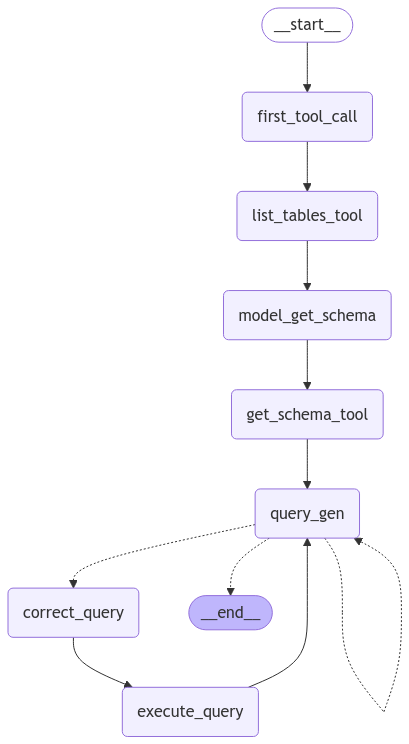

In [60]:
from langchain_community.utilities import SQLDatabase

In [61]:
db=SQLDatabase.from_uri("sqlite:///mydb.db")

In [62]:
db

In [63]:
db.dialect

'sqlite'

In [64]:
db.get_usable_table_names()

['customers', 'employees', 'orders']

In [65]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="llama3-70b-8192")

In [66]:
llm.invoke("hello how are you?")

AIMessage(content="Hello! I'm doing well, thanks for asking. I'm a large language model, so I don't have emotions like humans do, but I'm always happy to chat with you and help with any questions or topics you'd like to discuss. How about you? How's your day going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 15, 'total_tokens': 76, 'completion_time': 0.176160111, 'prompt_time': 0.003615355, 'queue_time': 0.017981213, 'total_time': 0.179775466}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'stop', 'logprobs': None}, id='run-2e7246e2-bd33-4b27-a15e-768b289769c9-0', usage_metadata={'input_tokens': 15, 'output_tokens': 61, 'total_tokens': 76})

In [67]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit

In [68]:
toolkit=SQLDatabaseToolkit(db=db, llm=llm)

In [69]:
tools=toolkit.get_tools()

In [70]:
tools

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002023D328700>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002023D328700>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002023D328700>),
 QuerySQLCheckerTool(description='Use this tool to 

In [71]:
for tool in tools:
    print(tool.name)

sql_db_query
sql_db_schema
sql_db_list_tables
sql_db_query_checker


In [72]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None)

In [73]:
list_tables_tool

ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002023D328700>)

In [74]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None)

In [75]:
get_schema_tool

InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000002023D328700>)

In [76]:
llm_to_get_schema=llm.bind_tools([get_schema_tool])

In [77]:
list_tables_tool.invoke("")

'customers, employees, orders'

In [78]:
print(get_schema_tool.invoke("customers"))


CREATE TABLE customers (
	customer_id INTEGER, 
	first_name TEXT NOT NULL, 
	last_name TEXT NOT NULL, 
	email TEXT NOT NULL, 
	phone TEXT, 
	PRIMARY KEY (customer_id), 
	UNIQUE (email)
)

/*
3 rows from customers table:
customer_id	first_name	last_name	email	phone
1	John	Doe	john.doe@example.com	1234567890
2	Jane	Smith	jane.smith@example.com	9876543210
3	Emily	Davis	emily.davis@example.com	4567891230
*/


The method `run_no_throw()` suggests that it executes a query (likely against a database) and handles exceptions internally without throwing them to the caller. The goal is typically to ensure the program continues running smoothly even if the query fails.

### Key Features of `run_no_throw()`
1. **Execute a Query**: Runs the SQL query passed as an argument.
2. **Error Handling**: Catches and suppresses exceptions, such as SQL syntax errors or connection issues, instead of letting them propagate.
3. **Returns a Result**: Often, it either:
   - Returns the query result if successful.
   - Returns a fallback value (like `None` or an empty dataset) in case of failure.

### Why Use `run_no_throw()`?
- **Resilience**: Ensures the application doesn't crash due to unexpected database errors.
- **Simplified Code**: Avoids the need for explicit `try...except` blocks around each database query.
- **Controlled Behavior**: Offers predictable behavior in scenarios where the query might fail (e.g., in exploratory or error-prone tasks).

### Example Implementation
If you were implementing such a method in Python, it might look like this:

```python
class Database:
    def run_no_throw(self, query):
        try:
            # Assume `self.connection` is a valid database connection
            cursor = self.connection.cursor()
            cursor.execute(query)
            return cursor.fetchall()  # Or another method to retrieve results
        except Exception as e:
            print(f"Error executing query: {e}")
            return None  # Fallback value
```

### Usage Example
```python
db = Database()

# A safe way to run queries without crashing the program
result = db.run_no_throw("SELECT * FROM users WHERE age > 30")

if result is not None:
    print("Query executed successfully:", result)
else:
    print("Query failed, but the program continues running.")
```

### When to Use It
- **Testing/Debugging**: To test queries without interrupting the workflow.
- **Non-Critical Queries**: For queries where failure can be safely ignored or logged.
- **Fail-Safe Operations**: When the system must keep running regardless of individual query outcomes.

If this function is part of a specific library or framework, its exact behavior might vary, but it generally follows this pattern. If you're working in a specific framework, its documentation might provide more details.

In [79]:
from langchain_core.tools import tool
@tool
def query_to_database(query:str)->str:
    """
    Execute a SQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result=db.run_no_throw(query)
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result

In [80]:
query_to_database.invoke("SELECT * FROM Employees;")

"[(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0), (2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0), (3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0), (4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)]"

In [81]:
llm_with_tools=llm.bind_tools([query_to_database])

In [82]:
llm_with_tools.invoke("SELECT * FROM Employees;")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hmwg', 'function': {'arguments': '{"query":"SELECT * FROM Employees;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 947, 'total_tokens': 995, 'completion_time': 0.137142857, 'prompt_time': 0.152200009, 'queue_time': 0.020400542999999993, 'total_time': 0.289342866}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_7ab5f7e105', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b09e51c7-0663-4199-8257-73b06c7902d0-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM Employees;'}, 'id': 'call_hmwg', 'type': 'tool_call'}], usage_metadata={'input_tokens': 947, 'output_tokens': 48, 'total_tokens': 995})

tool_calls=[
  {
    'name': 'query_to_database',
    'args': {
      'query': 'SELECT * FROM Employees;'
    },
    'id': 'call_9mqv',
    'type': 'tool_call'
  }
],

'tool_calls': [
    {
      'id': 'call_9mqv',
      'function': {
        'arguments': '{"query":"SELECT * FROM Employees;"}',
        'name': 'query_to_database'
      },
      'type': 'function'
    }
  ]

AIMessage(content='', 

additional_kwargs={'tool_calls': [{'id': 'call_9mqv', 'function': {'arguments': '{"query":"SELECT * FROM Employees;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 947, 'total_tokens': 995, 'completion_time': 0.137142857, 'prompt_time': 0.154736626, 'queue_time': 0.019792103000000005, 'total_time': 0.291879483}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_7ab5f7e105', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2bb48a2f-3090-4a74-9b2d-60c85867c65d-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM Employees;'}, 'id': 'call_9mqv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 947, 'output_tokens': 48, 'total_tokens': 995})

In [83]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [84]:
from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from langchain_core.pydantic_v1 import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode

In [85]:
from langchain_core.prompts import ChatPromptTemplate

query_check_system = """You are a SQL expert. Carefully review the SQL query for common mistakes, including:

Issues with NULL handling (e.g., NOT IN with NULLs)
Improper use of UNION instead of UNION ALL
Incorrect use of BETWEEN for exclusive ranges
Data type mismatches or incorrect casting
Quoting identifiers improperly
Incorrect number of arguments in functions
Errors in JOIN conditions

If you find any mistakes, rewrite the query to fix them. If it's correct, reproduce it as is."""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

check_generated_query = query_check_prompt | llm_with_tools

In [86]:
check_generated_query.invoke({"messages": [("user", "SELECT * FROM Employees LIMIT 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_kph9', 'function': {'arguments': '{"query":"SELECT * FROM Employees LIMIT 5;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 1051, 'total_tokens': 1102, 'completion_time': 0.1513041, 'prompt_time': 0.055698742, 'queue_time': 0.018043682999999998, 'total_time': 0.207002842}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e9be67b8-c934-493b-b714-73cb590c38c9-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM Employees LIMIT 5;'}, 'id': 'call_kph9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1051, 'output_tokens': 51, 'total_tokens': 1102})

In [87]:
check_generated_query.invoke({"messages": [("user", "SELECT +++ FROM Employees LIMITs 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_58hh', 'function': {'arguments': '{"query":"SELECT * FROM Employees LIMIT 5"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 1052, 'total_tokens': 1102, 'completion_time': 0.146675044, 'prompt_time': 0.049527922, 'queue_time': 0.018962842999999993, 'total_time': 0.196202966}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3ad2ddca-eacd-4b74-abed-8f2726357ad8-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM Employees LIMIT 5'}, 'id': 'call_58hh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1052, 'output_tokens': 50, 'total_tokens': 1102})

In [88]:
check_generated_query.invoke({"messages": [("user", "SELECT everything FROM Employees LIMITs 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_708p', 'function': {'arguments': '{"query":"SELECT * FROM Employees LIMIT 5;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 1052, 'total_tokens': 1132, 'completion_time': 0.236396659, 'prompt_time': 0.051982134, 'queue_time': 0.016395595, 'total_time': 0.288378793}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-af3be64c-8cbd-4de2-9c60-0c94e2a725b0-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM Employees LIMIT 5;'}, 'id': 'call_708p', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1052, 'output_tokens': 80, 'total_tokens': 1132})

In [89]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user")
    
llm_with_final_answer=llm.bind_tools([SubmitFinalAnswer])

In [90]:
# Add a node for a model to generate a query based on the question and schema
query_gen_system_prompt = """You are a SQL expert with a strong attention to detail.Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

1. DO NOT call any tool besides SubmitFinalAnswer to submit the final answer. When generating the query:

2. Output the SQL query that answers the input question without a tool call.

3. Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.

4. You can order the results by a relevant column to return the most interesting examples in the database.

5. Never query for all the columns from a specific table, only ask for the relevant columns given the question.

6. If you get an error while executing a query, rewrite the query and try again.

7. If you get an empty result set, you should try to rewrite the query to get a non-empty result set.

8. NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

9. If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

10. DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer.

11. rewrite this promote with very simple english and little shorter manner also """

query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system_prompt), ("placeholder", "{messages}")])

query_generator = query_gen_prompt | llm_with_final_answer

In [91]:
query_gen_prompt

ChatPromptTemplate(input_variables=[], optional_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annot

In [92]:
query_generator.invoke({"messages": [("can you fetch the data from employee table?")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7qxv', 'function': {'arguments': '{"final_answer":"SELECT * FROM employee LIMIT 5"}', 'name': 'SubmitFinalAnswer'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 1227, 'total_tokens': 1278, 'completion_time': 0.148248249, 'prompt_time': 0.064535367, 'queue_time': 0.017745763999999997, 'total_time': 0.212783616}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-06ce4d3f-48d1-4822-8589-464d49838868-0', tool_calls=[{'name': 'SubmitFinalAnswer', 'args': {'final_answer': 'SELECT * FROM employee LIMIT 5'}, 'id': 'call_7qxv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1227, 'output_tokens': 51, 'total_tokens': 1278})

In [93]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [94]:
def first_tool_call(state:State)->dict[str,list[AIMessage]]:
    return{"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}

In [95]:
def handle_tool_error(state:State):
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    return { "messages": [ ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],) for tc in tool_calls ] }

In [96]:
def create_node_from_tool_with_fallback(tools:list)-> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [97]:
def check_the_given_query(state:State):
    return {"messages": [check_generated_query.invoke({"messages": [state["messages"][-1]]})]}

In [98]:
def generation_query(state:State):
    message = query_generator.invoke(state)

    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

In [99]:
def should_continue(state:State):
    messages = state["messages"]
    last_message = messages[-1]
    if getattr(last_message, "tool_calls", None):
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"

In [100]:
list_tables=create_node_from_tool_with_fallback([list_tables_tool])

In [101]:
get_schema=create_node_from_tool_with_fallback([get_schema_tool])

In [75]:
get_schema_tool.invoke(AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_s40m', 'function': {'arguments': '{"table_names":"orders"}', 'name': 'sql_db_schema'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 1059, 'total_tokens': 1094, 'completion_time': 0.104650804, 'prompt_time': 0.056007903, 'queue_time': 0.018336399000000003, 'total_time': 0.160658707}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6b65ca0f-8c99-4918-9742-f77db5402121-0', tool_calls=[{'name': 'sql_db_schema', 'args': {'table_names': 'orders'}, 'id': 'call_s40m', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1059, 'output_tokens': 35, 'total_tokens': 1094}))

ValidationError: 1 validation error for _InfoSQLDatabaseToolInput
  Input should be a valid dictionary or instance of _InfoSQLDatabaseToolInput [type=model_type, input_value=AIMessage(content='', add..., 'total_tokens': 1094}), input_type=AIMessage]
    For further information visit https://errors.pydantic.dev/2.10/v/model_type

In [77]:
get_schema.invoke(AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_s40m', 'function': {'arguments': '{"table_names":"orders"}', 'name': 'sql_db_schema'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 1059, 'total_tokens': 1094, 'completion_time': 0.104650804, 'prompt_time': 0.056007903, 'queue_time': 0.018336399000000003, 'total_time': 0.160658707}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6b65ca0f-8c99-4918-9742-f77db5402121-0', tool_calls=[{'name': 'sql_db_schema', 'args': {'table_names': 'orders'}, 'id': 'call_s40m', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1059, 'output_tokens': 35, 'total_tokens': 1094}))

ValueError: If 'exception_key' is specified then input must be a dictionary.However found a type of <class 'langchain_core.messages.ai.AIMessage'> for input

In [ ]:
AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_s40m', 'function': {'arguments': '{"table_names":"orders"}', 'name': 'sql_db_schema'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 1059, 'total_tokens': 1094, 'completion_time': 0.104650804, 'prompt_time': 0.056007903, 'queue_time': 0.018336399000000003, 'total_time': 0.160658707}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6b65ca0f-8c99-4918-9742-f77db5402121-0', tool_calls=[{'name': 'sql_db_schema', 'args': {'table_names': 'orders'}, 'id': 'call_s40m', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1059, 'output_tokens': 35, 'total_tokens': 1094})

In [102]:
query_database=create_node_from_tool_with_fallback([query_to_database])

In [103]:
def llm_get_schema(state:State):
    print("this is my state", state)
    response = llm_to_get_schema.invoke(state["messages"])
    {"messages": [response]}

In [45]:
[HumanMessage(content='how many order are there which is more than 300 rupees?', additional_kwargs={}, response_metadata={}, id='0571873a-df8f-4673-942c-ea73a052f7d6'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='bcaf622f-b11e-4502-b5ef-0b784bc5bdf1', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='a48f6154-23de-47f0-887c-2888405ced08', tool_call_id='tool_abcd123')]

NameError: name 'HumanMessage' is not defined

In [104]:
from langchain_core.messages import BaseMessage, HumanMessage

In [74]:
llm_to_get_schema.invoke([HumanMessage(content='how many order are there which is more than 300 rupees?', additional_kwargs={}, response_metadata={}, id='0571873a-df8f-4673-942c-ea73a052f7d6'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='bcaf622f-b11e-4502-b5ef-0b784bc5bdf1', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='a48f6154-23de-47f0-887c-2888405ced08', tool_call_id='tool_abcd123')])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_s40m', 'function': {'arguments': '{"table_names":"orders"}', 'name': 'sql_db_schema'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 1059, 'total_tokens': 1094, 'completion_time': 0.104650804, 'prompt_time': 0.056007903, 'queue_time': 0.018336399000000003, 'total_time': 0.160658707}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6b65ca0f-8c99-4918-9742-f77db5402121-0', tool_calls=[{'name': 'sql_db_schema', 'args': {'table_names': 'orders'}, 'id': 'call_s40m', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1059, 'output_tokens': 35, 'total_tokens': 1094})

In [105]:
workflow = StateGraph(State)
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", list_tables)
workflow.add_node("get_schema_tool", get_schema)
workflow.add_node("model_get_schema", llm_get_schema)
workflow.add_node("query_gen", generation_query)
workflow.add_node("correct_query", check_the_given_query)
workflow.add_node("execute_query", query_database)

In [106]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,
                            {END:END,
                            "correct_query":"correct_query"})
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [107]:
app=workflow.compile()

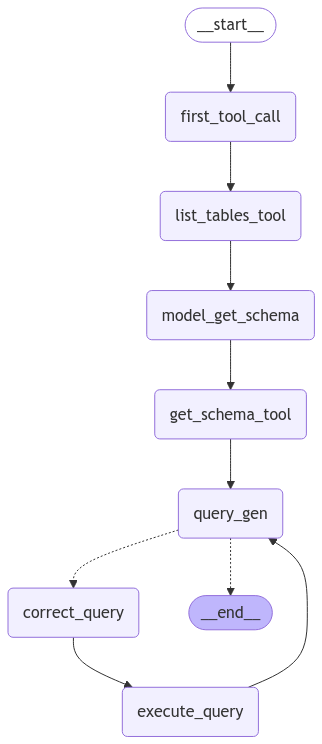

In [108]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [109]:
query={"messages": [("user", "how many order are there which is more than 300 rupees?")]}

In [110]:
response=app.invoke(query)

this is my state {'messages': [HumanMessage(content='how many order are there which is more than 300 rupees?', additional_kwargs={}, response_metadata={}, id='fc1755da-93c7-4d49-a4dd-86491ebc1a0b'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='f6b062f1-cfdc-4950-a0fe-4711c9f7d5a3', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='1ed4437c-03be-48ec-93b5-29159a130469', tool_call_id='tool_abcd123')]}


ValueError: Last message is not an AIMessage

In [63]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

'There are 1 order which is more than 300 rupees.'

employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

Basic Questions

About Customers Table:
How many customers are in the customers table?
List all customers with their email addresses.
Show the phone numbers of customers whose last name is "Smith."

About Orders Table:
How many orders are in the orders table?
What is the total amount of all orders combined?
List all orders placed on or after "2023-12-01."
Using WHERE Clause:
Which customers placed orders greater than $300?
Show all customers whose email contains "example.com."

Intermediate Questions

Joins:
List all orders with the customer’s first and last name.
Find the total amount spent by each customer.
Show orders along with customer details where the order amount is greater than $200.

Aggregation:
What is the average order amount?
How many orders were placed by each customer?
What is the highest order amount, and who placed it?

Date Queries:
How many orders were placed in December 2023?
Show customers who have not placed any orders.
Find the most recent order date in the orders table.
Advanced Questions
Subqueries:

Which customer placed the maximum number of orders?
List customers who placed orders totaling more than $500.
Find customers who haven't placed any orders yet.
Window Functions (if supported):

Rank customers based on the total amount they spent.
Show the running total of order amounts by date.
Error Handling/Edge Cases:

What happens if a customer ID exists in orders but not in customers?
How does the database behave when two customers have the same email address?
Testing Agent Capabilities
Complex Queries:
Show the top 3 customers who spent the most money.
List all customers and their total order amount, including those who haven't placed any orders (use LEFT JOIN).
Find customers who placed orders only in the last 30 days.

In [ ]:
app.stream()

In [ ]:
snshrivas3365@gmail.com